In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [ ]:
fake = pd.read_csv("Fake.csv")
true = pd.read_csv("True.csv")

In [ ]:
fake.shape

(23481, 4)

In [ ]:
true.shape

(21417, 4)

In [ ]:
# Add flag to track fake and real
fake['target'] = 'fake'
true['target'] = 'true'

In [ ]:
# Concatenate dataframes
data = pd.concat([fake, true]).reset_index(drop = True)
data.shape

(44898, 5)

In [ ]:
# Shuffle the data
from sklearn.utils import shuffle
data = shuffle(data)
data = data.reset_index(drop=True)

In [ ]:
# Check the data
data.head()

,title,text,subject,date,target
0,BREAKING: Putin Directly Orchestrated Hacks T...,It s no secret that Russia was behind the elec...,News,"December 14, 2016",fake
1,Bernie Sanders Explains The Exact Reason Trum...,A pre-general election debate between Bernie S...,News,"May 28, 2016",fake
2,U.S. Senate leader says Iran sanctions renewal...,WASHINGTON (Reuters) - The U.S. Senate will vo...,politicsNews,"November 16, 2016",true
3,Trump Abruptly Cancels Interview For An EXTRE...,Donald Trump might be desperately trying to wi...,News,"May 16, 2016",fake
4,"'Three Amigos' Obama, Trudeau, Pena Nieto to m...",WASHINGTON (Reuters) - U.S. President Barack O...,politicsNews,"May 4, 2016",true


In [ ]:
# Removing the date column (we won't use it for the analysis)
data.drop(["date"],axis=1,inplace=True)
data.head()

,title,text,subject,target
0,BREAKING: Putin Directly Orchestrated Hacks T...,It s no secret that Russia was behind the elec...,News,fake
1,Bernie Sanders Explains The Exact Reason Trum...,A pre-general election debate between Bernie S...,News,fake
2,U.S. Senate leader says Iran sanctions renewal...,WASHINGTON (Reuters) - The U.S. Senate will vo...,politicsNews,true
3,Trump Abruptly Cancels Interview For An EXTRE...,Donald Trump might be desperately trying to wi...,News,fake
4,"'Three Amigos' Obama, Trudeau, Pena Nieto to m...",WASHINGTON (Reuters) - U.S. President Barack O...,politicsNews,true


In [ ]:
# Removing the title column (we will only use the text)
data.drop(["title"],axis=1,inplace=True)
data.head()

,text,subject,target
0,It s no secret that Russia was behind the elec...,News,fake
1,A pre-general election debate between Bernie S...,News,fake
2,WASHINGTON (Reuters) - The U.S. Senate will vo...,politicsNews,true
3,Donald Trump might be desperately trying to wi...,News,fake
4,WASHINGTON (Reuters) - U.S. President Barack O...,politicsNews,true


In [ ]:
# Convert to lowercase

data['text'] = data['text'].apply(lambda x: x.lower())
data.head()

,text,subject,target
0,it s no secret that russia was behind the elec...,News,fake
1,a pre-general election debate between bernie s...,News,fake
2,washington (reuters) - the u.s. senate will vo...,politicsNews,true
3,donald trump might be desperately trying to wi...,News,fake
4,washington (reuters) - u.s. president barack o...,politicsNews,true


In [ ]:
# Remove punctuation

import string

def punctuation_removal(text):
    all_list = [char for char in text if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str

data['text'] = data['text'].apply(punctuation_removal)

In [ ]:
# Check
data.head()

,text,subject,target
0,it s no secret that russia was behind the elec...,News,fake
1,a pregeneral election debate between bernie sa...,News,fake
2,washington reuters the us senate will vote to...,politicsNews,true
3,donald trump might be desperately trying to wi...,News,fake
4,washington reuters us president barack obama ...,politicsNews,true


In [ ]:
# Removing stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
data.head()

,text,subject,target
0,secret russia behind election hacks donald tru...,News,fake
1,pregeneral election debate bernie sanders dona...,News,fake
2,washington reuters us senate vote renew sancti...,politicsNews,true
3,donald trump might desperately trying win lati...,News,fake
4,washington reuters us president barack obama c...,politicsNews,true


target
fake    23481
true    21417
Name: text, dtype: int64


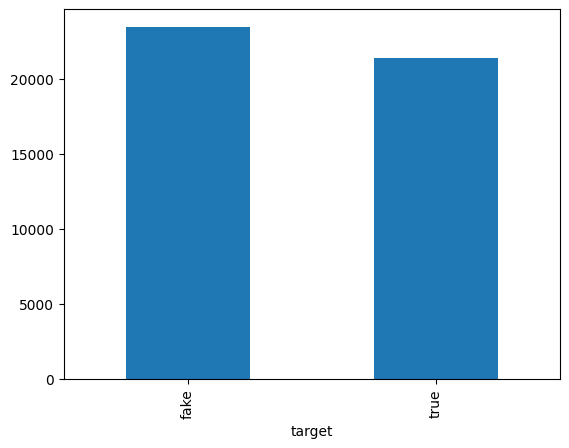

In [ ]:
# How many fake and real articles?
print(data.groupby(['target'])['text'].count())
data.groupby(['target'])['text'].count().plot(kind="bar")
plt.show()

In [ ]:
# Split the data
X_train,X_test,y_train,y_test = train_test_split(data['text'], data.target, test_size=0.2, random_state=42)

In [ ]:
# Vectorizing and applying TF-IDF
from sklearn.linear_model import LogisticRegression

pipe = Pipeline([('vect', CountVectorizer()),('tfidf', TfidfTransformer()),('model', LogisticRegression())])

# Fitting the model
model = pipe.fit(X_train, y_train)

# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 98.99%


In [ ]:
# Function to plot the confusion matrix (code from https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html)
from sklearn import metrics
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


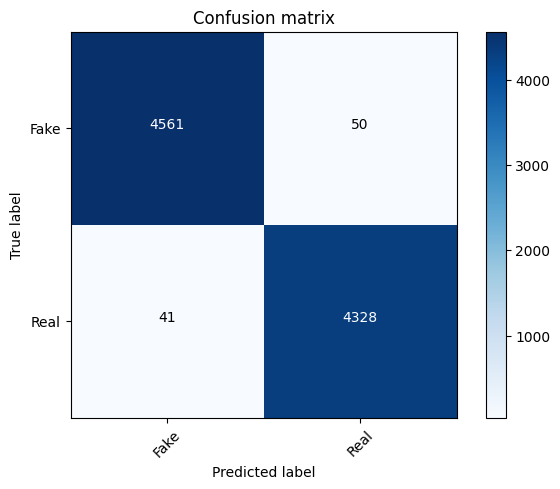

In [ ]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

In [ ]:
from sklearn.ensemble import RandomForestClassifier

pipe = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                 ('model', RandomForestClassifier(n_estimators=50, criterion="entropy"))])

model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 99.0%


Confusion matrix, without normalization


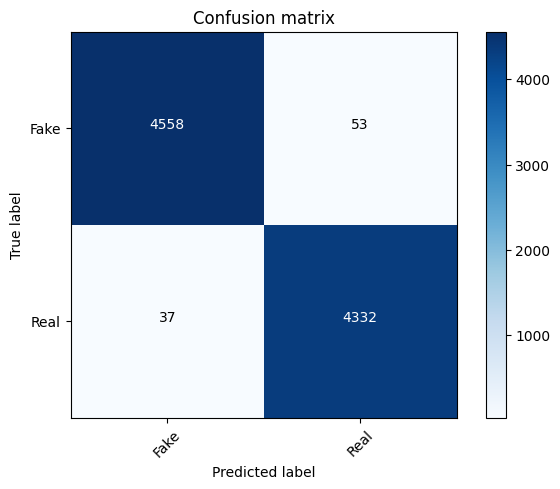

In [ ]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])